In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('Gpa.csv')
df.head(10)

,Hours Studied Weekly,Class Participation Rate,Field of Study,Secondary School GPA,Hobby Activities,Employment Status,Online Research Hours,Student ID,Age,Hometown,Preferred Study Time,College GPA
0,6.77,85.24,Science,3.32,3,Unemployed,2.68,256811.0,22.0,Santa Ana,Afternoon,2.56
1,11.86,62.25,Engineering,3.34,3,Employed,16.84,878869.0,19.0,San Jose,Afternoon,3.05
2,0.58,94.29,Business,3.61,4,Unemployed,10.06,509916.0,22.0,San Francisco,Afternoon,2.89
3,19.35,53.94,Business,3.55,2,Employed,15.64,217307.0,22.0,San Francisco,NaN,3.19
4,38.79,73.80,Science,2.95,2,Employed,7.71,371517.0,22.0,Anaheim,Evening,3.40
5,11.26,71.82,Arts,2.21,0,Unemployed,18.38,223734.0,22.0,San Jose,Evening,2.86
6,26.79,93.12,Engineering,3.63,1,Unemployed,12.70,968826.0,21.0,San Jose,Evening,3.71
7,33.77,98.44,Arts,3.20,2,Employed,19.36,327809.0,25.0,Fresno,Afternoon,4.00
8,37.58,97.68,Arts,2.07,2,Employed,4.29,718662.0,24.0,San Jose,Evening,3.18
9,1.01,52.75,Business,3.58,0,Unemployed,10.68,685316.0,23.0,San Jose,Morning,2.47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hours Studied Weekly      1200 non-null   float64
 1   Class Participation Rate  1163 non-null   float64
 2   Field of Study            1200 non-null   object 
 3   Secondary School GPA      1200 non-null   float64
 4   Hobby Activities          1200 non-null   int64  
 5   Employment Status         1200 non-null   object 
 6   Online Research Hours     1200 non-null   float64
 7   Student ID                1087 non-null   float64
 8   Age                       1188 non-null   float64
 9   Hometown                  1200 non-null   object 
 10  Preferred Study Time      1103 non-null   object 
 11  College GPA               1200 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 112.6+ KB


In [6]:
print("Missing value before dropping: ")
print(df.isna().sum())

print("")
print("Missing value after dropping: ")
df.dropna(inplace=True)
print(df.isna().sum())

Missing value before dropping: 
Hours Studied Weekly          0
Class Participation Rate     37
Field of Study                0
Secondary School GPA          0
Hobby Activities              0
Employment Status             0
Online Research Hours         0
Student ID                  113
Age                          12
Hometown                      0
Preferred Study Time         97
College GPA                   0
dtype: int64

Missing value after dropping: 
Hours Studied Weekly        0
Class Participation Rate    0
Field of Study              0
Secondary School GPA        0
Hobby Activities            0
Employment Status           0
Online Research Hours       0
Student ID                  0
Age                         0
Hometown                    0
Preferred Study Time        0
College GPA                 0
dtype: int64


In [ ]:

def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 'Good'
    elif gpa >= 2.0:
        return 'Neutral'
    else:
        return 'Bad'


df['GPA_Category'] = df['College GPA'].apply(categorize_gpa)

In [ ]:

label_encoders = {}
for column in ['Field of Study', 'Employment Status', 'Preferred Study Time', 'Hometown']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

target_le = LabelEncoder()
df['GPA_Category'] = target_le.fit_transform(df['GPA_Category'])

In [ ]:

features = ['Hours Studied Weekly', 'Class Participation Rate', 'Secondary School GPA',
            'Hobby Activities', 'Employment Status', 'Online Research Hours', 'Age', 'Preferred Study Time']
target = 'GPA_Category'

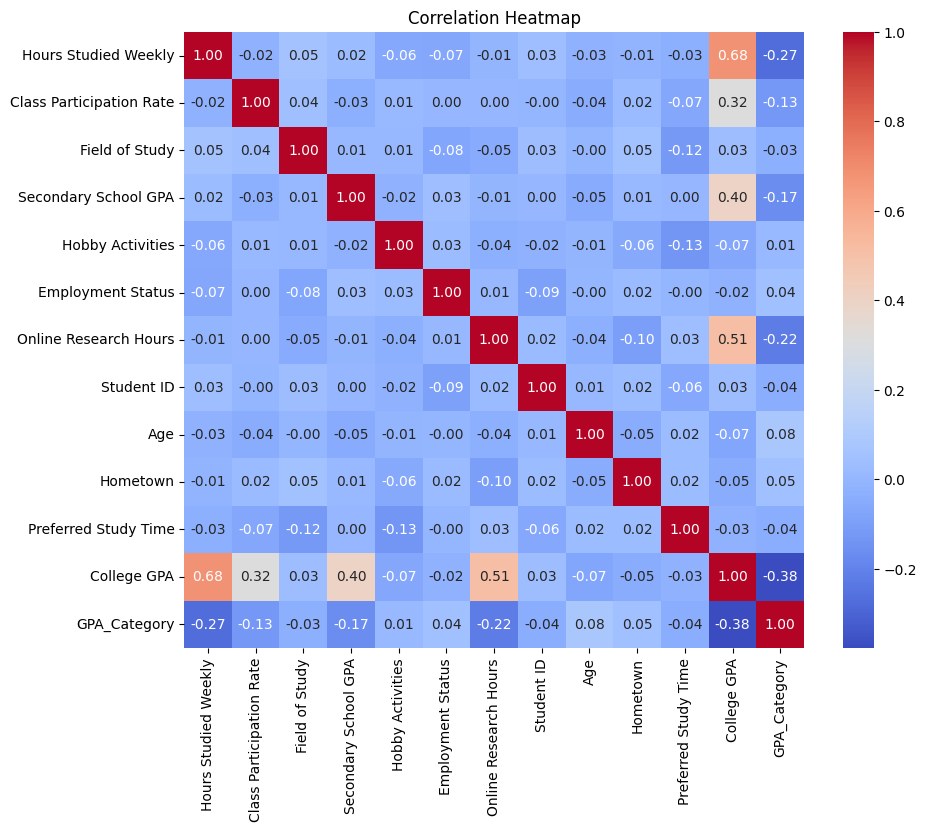

In [ ]:

corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df[features]
y = df[target]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

Training samples: 770, Testing samples: 193


Accuracy: 0.922
F1-score: 0.911
Recall: 0.922
Precision: 0.903


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


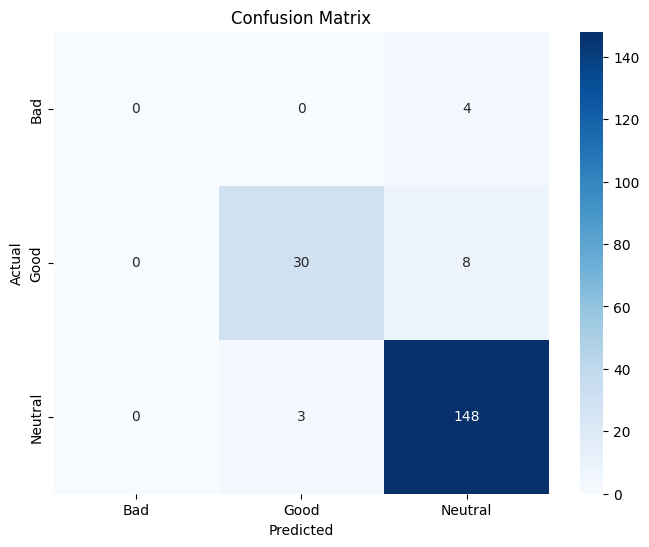

In [ ]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, knn_predictions)

accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy: {accuracy:.3f}")

f1 = f1_score(y_test, knn_predictions, average='weighted')
print(f"F1-score: {f1:.3f}")

recall = recall_score(y_test, knn_predictions, average='weighted')
print(f"Recall: {recall:.3f}")

precision = precision_score(y_test, knn_predictions, average='weighted')
print(f"Precision: {precision:.3f}")


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()